# Lab 9- Deep Learning Model

This lab is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat your previous lab, but with DNNs.

Let's start with reading the data, like before:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi","MET", "MET_phi", "MET_rel", "axial_MET"]
FeatureNames=["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, make the final version of your plots with the full sample. 

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [2]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])


## Exercise 1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

* Has you model's performance plateaued? If not train for more epochs. 
* Compare the performance on training versus test sample. Are you over training?

2024-04-30 22:51:50.479322: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-30 22:51:50.487169: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 22:51:50.594893: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 22:51:50.596122: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 22:51:51.832437: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Epoch 1/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4459 - accuracy: 0.7927 - val_loss: 0.4353 - val_accuracy: 0.8003
Epoch 2/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4343 - accuracy: 0.7995 - val_loss: 0.4334 - val_accuracy: 0.8010
Epoch 3/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4323 - accuracy: 0.8005 - val_loss: 0.4337 - val_accuracy: 0.8009
Epoch 4/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4310 - accuracy: 0.8009 - val_loss: 0.4303 - val_accuracy: 0.8023
Epoch 5/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4300 - accuracy: 0.8012 - val_loss: 0.4301 - val_accuracy: 0.8029
Epoch 6/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4296 - accuracy: 0.8019 - val_loss: 0.4298 - val_accuracy: 0.8029
Epoch 7/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4288 - accuracy: 0.8021 - val_loss: 0.4306 - val_accuracy:

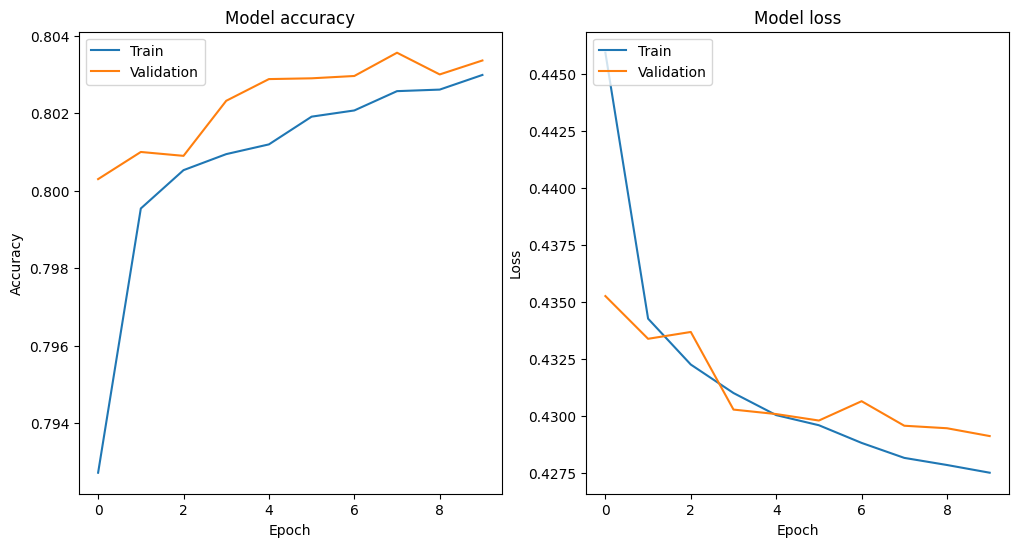

In [3]:
#I will make 3 DNN's with mostly only changing the Dense hyperparameters.
from keras.models import Sequential
from keras.layers import Dense

# Defining the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(VarNames)-1,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_Train, y_Train, epochs=10, batch_size=128, validation_split=0.1)

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Ploting the training history
plot_history(history)


Epoch 1/10
3516/3516 [==============================] - 5s 1ms/step - loss: 0.4406 - accuracy: 0.7961 - val_loss: 0.4366 - val_accuracy: 0.7998
Epoch 2/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4333 - accuracy: 0.7996 - val_loss: 0.4331 - val_accuracy: 0.8023
Epoch 3/10
3516/3516 [==============================] - 5s 1ms/step - loss: 0.4314 - accuracy: 0.8005 - val_loss: 0.4305 - val_accuracy: 0.8026
Epoch 4/10
3516/3516 [==============================] - 5s 1ms/step - loss: 0.4300 - accuracy: 0.8018 - val_loss: 0.4305 - val_accuracy: 0.8037
Epoch 5/10
3516/3516 [==============================] - 5s 1ms/step - loss: 0.4291 - accuracy: 0.8023 - val_loss: 0.4306 - val_accuracy: 0.8005
Epoch 6/10
3516/3516 [==============================] - 5s 1ms/step - loss: 0.4281 - accuracy: 0.8025 - val_loss: 0.4293 - val_accuracy: 0.8027
Epoch 7/10
3516/3516 [==============================] - 5s 1ms/step - loss: 0.4278 - accuracy: 0.8025 - val_loss: 0.4322 - val_accuracy:

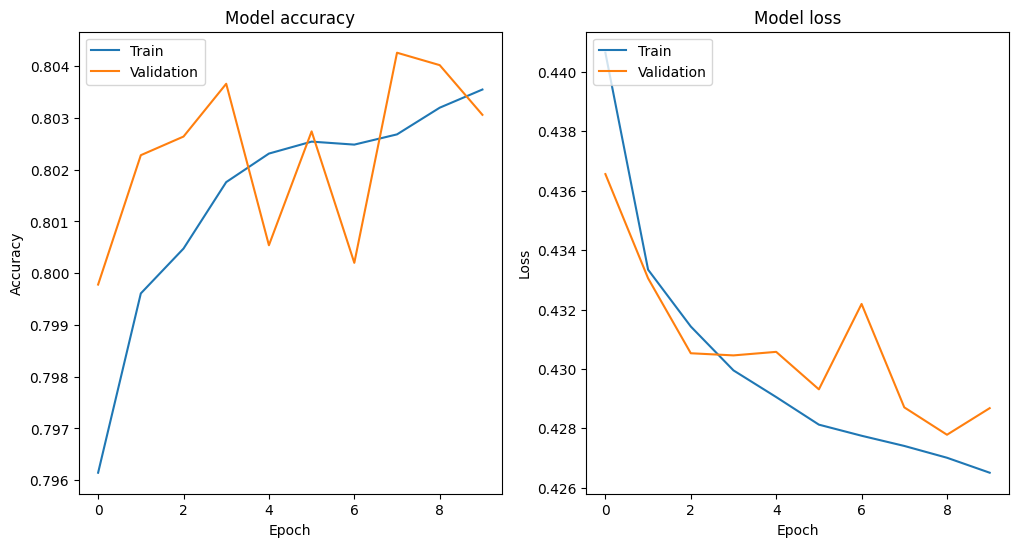

In [4]:
#Increasing the dense hyperparameters here. 
from keras.models import Sequential
from keras.layers import Dense

def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(len(VarNames)-1,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Creating the new model
new_model = create_model()

# Training the new model
new_history = new_model.fit(X_Train, y_Train, epochs=10, batch_size=128, validation_split=0.1)

# Ploting the training history for the new model
plot_history(new_history)


Epoch 1/10
3516/3516 [==============================] - 6s 2ms/step - loss: 0.4414 - accuracy: 0.7953 - val_loss: 0.4398 - val_accuracy: 0.7988
Epoch 2/10
3516/3516 [==============================] - 6s 2ms/step - loss: 0.4337 - accuracy: 0.7997 - val_loss: 0.4322 - val_accuracy: 0.8013
Epoch 3/10
3516/3516 [==============================] - 6s 2ms/step - loss: 0.4316 - accuracy: 0.8006 - val_loss: 0.4313 - val_accuracy: 0.8022
Epoch 4/10
3516/3516 [==============================] - 6s 2ms/step - loss: 0.4299 - accuracy: 0.8017 - val_loss: 0.4311 - val_accuracy: 0.8037
Epoch 5/10
3516/3516 [==============================] - 6s 2ms/step - loss: 0.4291 - accuracy: 0.8022 - val_loss: 0.4299 - val_accuracy: 0.8034
Epoch 6/10
3516/3516 [==============================] - 6s 2ms/step - loss: 0.4284 - accuracy: 0.8027 - val_loss: 0.4302 - val_accuracy: 0.8030
Epoch 7/10
3516/3516 [==============================] - 6s 2ms/step - loss: 0.4278 - accuracy: 0.8027 - val_loss: 0.4298 - val_accuracy:

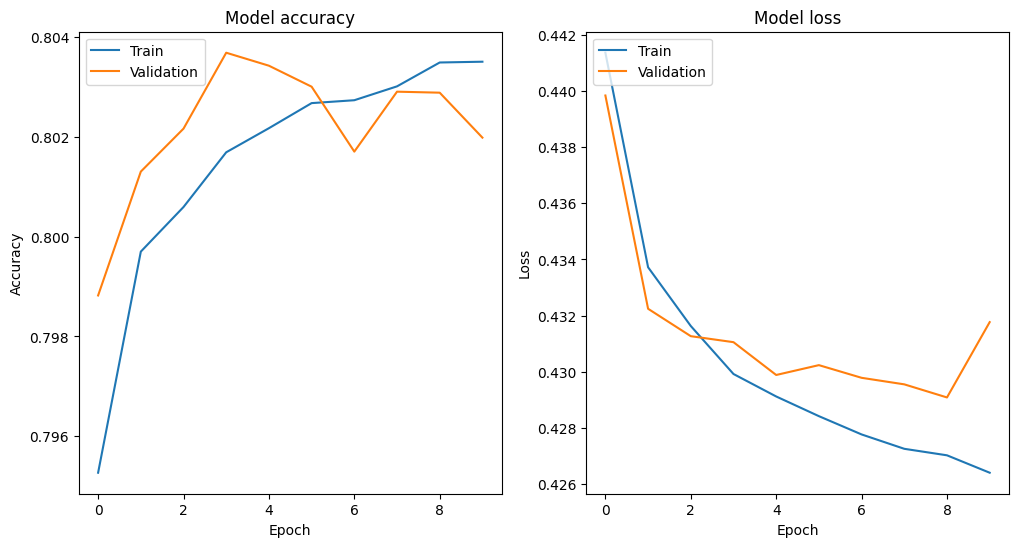

In [5]:
#Adding more Dense layers to this model.
def create_better_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(len(VarNames)-1,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Creating the new model with potentially better accuracy
better_model = create_better_model()

# Training the new model
better_history = better_model.fit(X_Train, y_Train, epochs=10, batch_size=128, validation_split=0.1)

# Ploting the training history for the better model
plot_history(better_history)


## Exercise 2

Following the original paper (see lab 6), make a comparison of the performance (using ROC curves and AUC) between models trained with raw, features, and raw+features data.

1563/1563 [==============================] - 1s 747us/step


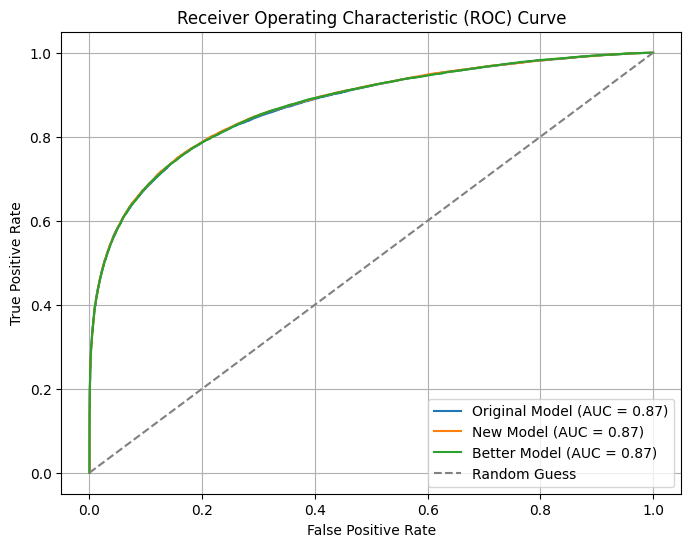

In [8]:
#Lab 6??? Where does the black jack game have a paper in it? I couldnt find the paper in lab 7 either. 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

#So instead I made a ROC curve with AUC of the 3 models I made instead 

# Get the predicted probabilities for each model
y_pred = model.predict(X_Test)
new_y_pred = new_model.predict(X_Test)
better_y_pred = better_model.predict(X_Test)

# Calculating predicted probabilities manually
y_pred_proba = y_pred.flatten()  # For binary classification, flatten the output
new_y_pred_proba = new_y_pred.flatten()
better_y_pred_proba = better_y_pred.flatten()

# Calculate ROC curve and AUC for each model here
fpr, tpr, _ = roc_curve(y_Test, y_pred_proba)
new_fpr, new_tpr, _ = roc_curve(y_Test, new_y_pred_proba)
better_fpr, better_tpr, _ = roc_curve(y_Test, better_y_pred_proba)

auc = roc_auc_score(y_Test, y_pred_proba)
new_auc = roc_auc_score(y_Test, new_y_pred_proba)
better_auc = roc_auc_score(y_Test, better_y_pred_proba)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Original Model (AUC = {auc:.2f})')
plt.plot(new_fpr, new_tpr, label=f'New Model (AUC = {new_auc:.2f})')
plt.plot(better_fpr, better_tpr, label=f'Better Model (AUC = {better_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

#We see 3 different overlaps with each other which means my models do not
#differ much in results. Or it mean mean i overfitted 3 different times.

## Exercise 3

Design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.

In [ ]:
#Wasn't the 3 different DNN models for question 1? Am I creating 5+ in total? Either way I made 3
#above and Ill make 3 more.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop, SGD

# Copied from aboove to run by itself.
filename = "../Lab.7/SUSY.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames = ["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi","MET", "MET_phi", "MET_rel", "axial_MET"]
FeatureNames = ["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

# Define training and test samples hyperparameters here.
N_Max = 550000
N_Train = 500000

Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:N_Max]

X_Train = np.array(Train_Sample[VarNames[1:]])
y_Train = np.array(Train_Sample["signal"])

X_Test = np.array(Test_Sample[VarNames[1:]])
y_Test = np.array(Test_Sample["signal"])

# Model 1
model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(len(VarNames)-1,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Model 2
model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(len(VarNames)-1,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_2.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['accuracy'])

# Model 3
model_3 = Sequential([
    Dense(256, activation='relu', input_shape=(len(VarNames)-1,)),
    Dense(1, activation='sigmoid')
])
model_3.compile(optimizer=SGD(momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

# Training all the models here
history_1 = model_1.fit(X_Train, y_Train, epochs=10, batch_size=128, validation_split=0.1)
history_2 = model_2.fit(X_Train, y_Train, epochs=10, batch_size=128, validation_split=0.1)
history_3 = model_3.fit(X_Train, y_Train, epochs=10, batch_size=128, validation_split=0.1)

# Ploting the training history for all models
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(history_1.history['accuracy'], label='Model 1')
plt.plot(history_1.history['val_accuracy'], label='Model 1 Validation')
plt.title('Model 1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_2.history['accuracy'], label='Model 2')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Validation')
plt.title('Model 2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_3.history['accuracy'], label='Model 3')
plt.plot(history_3.history['val_accuracy'], label='Model 3 Validation')
plt.title('Model 3 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#Model 2 is the best model here.

Epoch 1/10
3516/3516 [==============================] - 5s 1ms/step - loss: 0.4438 - accuracy: 0.7945 - val_loss: 0.4393 - val_accuracy: 0.7975
Epoch 2/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4340 - accuracy: 0.7997 - val_loss: 0.4344 - val_accuracy: 0.8006
Epoch 3/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4323 - accuracy: 0.8003 - val_loss: 0.4321 - val_accuracy: 0.8013
Epoch 4/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4313 - accuracy: 0.8004 - val_loss: 0.4314 - val_accuracy: 0.8025
Epoch 5/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4306 - accuracy: 0.8012 - val_loss: 0.4316 - val_accuracy: 0.8003
Epoch 6/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4297 - accuracy: 0.8015 - val_loss: 0.4304 - val_accuracy: 0.8032
Epoch 7/10
3516/3516 [==============================] - 4s 1ms/step - loss: 0.4290 - accuracy: 0.8020 - val_loss: 0.4315 - val_accuracy:

## Exercise 4

Repeat exercise 4 from Lab 7, adding your best performing DNN as one of the models.  


In [ ]:
#All of exercise 4?

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate

# Generating predictions using Model 2
predictions = model_2.predict(X_Test)

# Converting predictions to DataFrame for easier manipulation
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])

# Adding Actual labels to the DataFrame
predictions_df['Actual'] = y_Test

# Pair plots here using matplotlib modules.
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df['Predictions'], predictions_df['Actual'])
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Pair Plot of Predictions')
plt.grid(True)
plt.show()

# Histogram here using the matplotlib modules. 
plt.figure(figsize=(8, 6))
plt.hist(predictions_df['Predictions'], bins=30, alpha=0.7, color='blue', label='Predictions')
plt.hist(predictions_df['Actual'], bins=30, alpha=0.7, color='red', label='Actual')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Predictions and Actual Values')
plt.legend()
plt.grid(True)
plt.show()

# Compute covariance matrix by using the cov module from numpy.
covariance_matrix = np.cov(predictions_df.values.T)

# Compute correlation matrix by calling the corrcoef module from numpy.
correlation_matrix = np.corrcoef(predictions_df.values.T)

# Here we make tabulate matrices
covariance_headers = [''] + predictions_df.columns.tolist()
covariance_table = tabulate(covariance_matrix, headers=covariance_headers, tablefmt="fancy_grid", floatfmt=".4f")

correlation_headers = [''] + predictions_df.columns.tolist()
correlation_table = tabulate(correlation_matrix, headers=correlation_headers, tablefmt="fancy_grid", floatfmt=".4f")

# Displayin the covariance and correlation tables
print("Covariance Matrix:")
print(covariance_table)
print("\nCorrelation Matrix:")
print(correlation_table)

#This gives extreme differences for the actual data which means something isn't being calculated properly.
#Now we calculate the ROC and AUC again. 

from sklearn.metrics import roc_curve, roc_auc_score

# Computing the ROC curve here
fpr, tpr, thresholds = roc_curve(predictions_df['Actual'], predictions_df['Predictions'])

# Computing the AUC here
auc = roc_auc_score(predictions_df['Actual'], predictions_df['Predictions'])

# Ploting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
